Parse the BED File <br>
("mapped.bed" was too large to include in GitHub repo)

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [7]:
def parse_bed(file_path):
    data = []
    with open(file_path, 'r') as file:
        for line in file:
            cols = line.strip().split('\t')
            chr1, start1, end1 = cols[1], int(cols[2]), int(cols[3])  # Binding site (C1)
            chr2, start2, end2 = cols[7], int(cols[8]), int(cols[9])  # Fragment (C2)
            
            C1 = (start1 + end1) / 2
            C2 = (start2 + end2) / 2
            X = C2 - C1
            Y = end2 - start2
            data.append((X, Y))
    
    return pd.DataFrame(data, columns=['X', 'Y'])

df = parse_bed("mapped.bed")

Aggregate Frequencies (Z) for Each (X, Y)

In [8]:
# Group by (X, Y) and count occurrences
heatmap_data = df.groupby(['X', 'Y']).size().reset_index(name='Z')

Heatmap

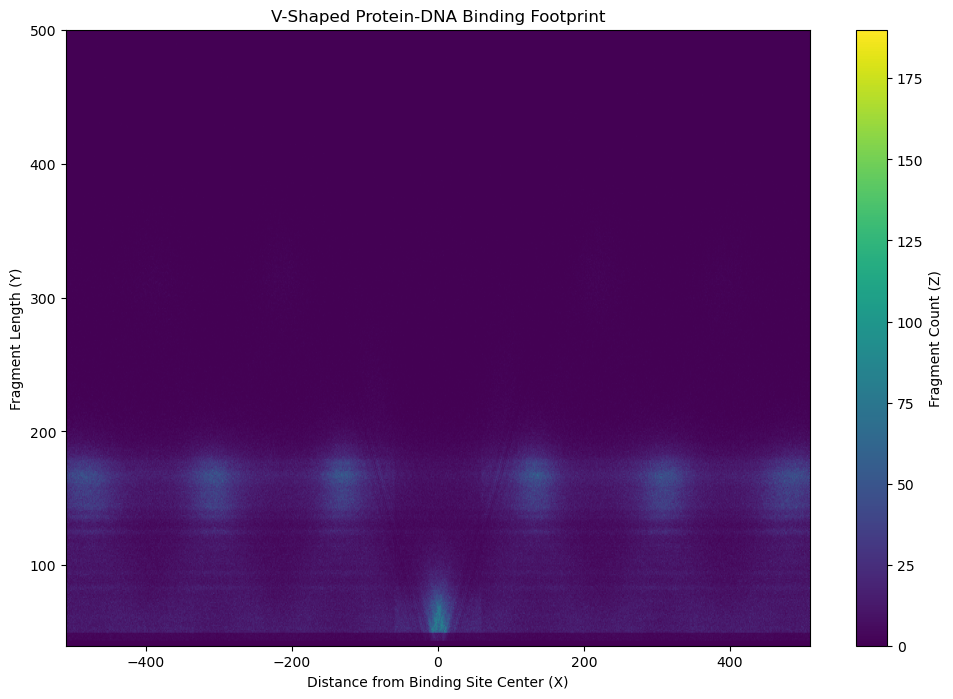

In [9]:
# Pivot data for heatmap
pivot_table = heatmap_data.pivot(index='Y', columns='X', values='Z').fillna(0)

# Plot
plt.figure(figsize=(12, 8))
plt.imshow(
    pivot_table.values,
    cmap='viridis',
    aspect='auto',
    extent=[pivot_table.columns.min(), pivot_table.columns.max(), pivot_table.index.max(), pivot_table.index.min()]
)
plt.colorbar(label='Fragment Count (Z)')
plt.xlabel('Distance from Binding Site Center (X)')
plt.ylabel('Fragment Length (Y)')
plt.title('V-Shaped Protein-DNA Binding Footprint')
plt.gca().invert_yaxis()  # Ensure Y-axis starts with larger fragments at the top
plt.show()